In [142]:
print('helloe world')

helloe world


In [189]:
from qdrant_client import QdrantClient
q = QdrantClient(host="localhost", port=6333)
q.delete_collection("agentforge_embeddings")

True

In [4]:
import requests
import json,os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Health Check

In [2]:
requests.get("http://localhost:8000/health/health").json()


ConnectionError: HTTPConnectionPool(host='localhost', port=8000): Max retries exceeded with url: /health/health (Caused by NewConnectionError("HTTPConnection(host='localhost', port=8000): Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it"))

# Text ingestion Test

In [147]:

files = {
    "file": ("sample.txt", open("examples/sample.txt", "rb"), "text/plain")
}

res = requests.post("http://localhost:8000/ingest/ingest", files=files)
print(res.status_code)
print(res.json())


200
{'doc_id': 'f436c762-be31-41fc-9ffc-e9cf07f2a203', 'type': 'text', 'chunks': 1}


In [148]:
from qdrant_client import QdrantClient
q = QdrantClient(host="localhost", port=6333)

points = q.scroll(collection_name="agentforge_embeddings", limit=5)[0]
points


[Record(id='c7d71b08-019d-4a61-8e4e-fc93acbda9bc', payload={'doc_id': 'f436c762-be31-41fc-9ffc-e9cf07f2a203', 'type': 'text', 'chunk_index': 0, 'text': 'Rohan walked down the quiet street as the evening breeze brushed past him. He spotted an old bookshop that he had never noticed before. Its wooden sign hung a bit crooked, and a soft glow shone from inside. Curious, he stepped in and found a dusty book lying open on the counter, as if it waited for him. When he touched the page, the words shifted and formed his name, hinting that this place held something he was meant to discover. He turned the page, and a faint shimmer rose from the paper, floating like tiny fireflies. The shop felt warmer now, almost alive, as if it breathed with him. A hidden door at the back creaked open on its own, revealing a narrow stairway leading down. Rohan hesitated for a moment, but his curiosity stayed stronger than his fear. He stepped forward, feeling that whatever waited below might change his path in w

In [149]:
os.listdir("examples")

['complex_data_v.jpg', 'photo_1.jpeg', 'robot_1.jpg', 'sample.txt']

In [150]:
print(res.status_code)
print(res.text)

200
{"doc_id":"f436c762-be31-41fc-9ffc-e9cf07f2a203","type":"text","chunks":1}


# TEXT RAG QUERY TEST

In [151]:
text="""
Rohan walked down the quiet street as the evening breeze brushed past him. He spotted an old bookshop that he had never noticed before. Its wooden sign hung a bit crooked, and a soft glow shone from inside. Curious, he stepped in and found a dusty book lying open on the counter, as if it waited for him. When he touched the page, the words shifted and formed his name, hinting that this place held something he was meant to discover.

He turned the page, and a faint shimmer rose from the paper, floating like tiny fireflies. The shop felt warmer now, almost alive, as if it breathed with him. A hidden door at the back creaked open on its own, revealing a narrow stairway leading down. Rohan hesitated for a moment, but his curiosity stayed stronger than his fear. He stepped forward, feeling that whatever waited below might change his path in ways he never expected.
"""

In [152]:
payload = {
    "question": "What does this document talk about?",
    "top_k": 5
}
res = requests.post("http://localhost:8000/query/", json=payload)
text_rag = res.json()
text_rag


{'answer': "This document appears to be a short story or passage of fiction, describing a young man named Rohan's encounter with an old bookshop and its mysterious contents. The story is likely fantastical or supernatural in nature, hinting at hidden secrets and unexplored paths for the protagonist.",
 'context': ['Rohan walked down the quiet street as the evening breeze brushed past him. He spotted an old bookshop that he had never noticed before. Its wooden sign hung a bit crooked, and a soft glow shone from inside. Curious, he stepped in and found a dusty book lying open on the counter, as if it waited for him. When he touched the page, the words shifted and formed his name, hinting that this place held something he was meant to discover. He turned the page, and a faint shimmer rose from the paper, floating like tiny fireflies. The shop felt warmer now, almost alive, as if it breathed with him. A hidden door at the back creaked open on its own, revealing a narrow stairway leading do

# Image Ingestion

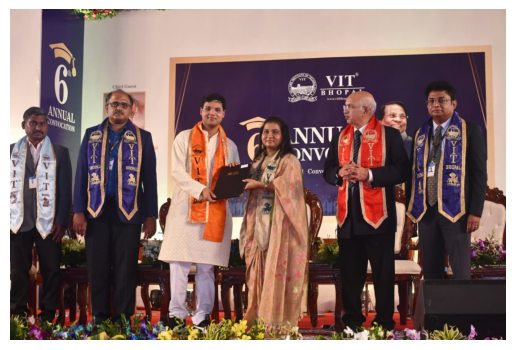

In [159]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('examples/photo_1.jpeg')

# Quick display without creating a figure explicitly
plt.imshow(img)
plt.axis('off')
plt.show()

In [161]:
with open("examples/photo_1.jpeg", "rb") as f:
    files = {"file": ("photo_1.jpg", f, "image/jpeg")}
    res = requests.post("http://localhost:8000/ingest/ingest", files=files)

img_ingest = res.json()
img_ingest


{'doc_id': '1c95b88a-313d-4cee-8046-8c4bd80ffc9a',
 'type': 'image',
 'caption': "The image is a photograph of an event with people standing on stage, some receiving awards, and individuals posing for the camera; there's a podium labeled 'VIT University Anniversary'; attendees are dressed formally with ties, and it appears to be a formal ceremony or celebration."}

# Image ingestion + Text image RAG query

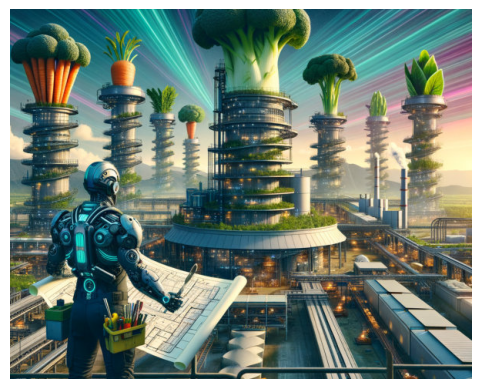

In [162]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('examples/robot_1.jpg')

plt.imshow(img)
plt.axis('off')
plt.show()

In [180]:
with open("examples/robot_1.jpg", "rb") as f:
    files = {"file": ("robot_1.jpg", f, "image/jpeg")}
    res_1 = requests.post("http://localhost:8000/ingest/ingest", files=files)

img_ingest_1 = res_1.json()
img_ingest_1


{'doc_id': 'a40de0ef-ae5f-4efa-9844-d9c60818291e',
 'type': 'image',
 'caption': 'Futuristic cityscape with a person standing in front of several towering vegetable-like buildings, overlooking an industrial area with smokestacks and machinery.'}

In [164]:
payload = {
    "question": "What is shown in the image? , What impression does this image leave you with? , What message do you take from this image?",
    "top_k": 5
}

res_1 = requests.post("http://localhost:8000/query/", json=payload)
img_rag_1 = res_1.json()
img_rag_1


{'answer': "Here are the answers to the user's questions based on the given context:\n\n1. What is shown in the image?\n\nThe first image is an animated illustration of a futuristic cityscape with broccoli-shaped buildings, surrounded by green plants and modern architecture under a multicolored sky.\n\nThe second image is a photograph of a formal ceremony or celebration at VIT University Anniversary, where people are receiving awards and posing for the camera.\n\nThe third image is an artistic rendering of a futuristic industrial city with floating gardens and plants, surrounded by towering buildings and skyscrapers.\n\n2. What impression does this image leave you with?\n\nEach image leaves a unique impression:\n- The first image conveys a sense of innovation, sustainability, and a possible blend of technology and nature.\n- The second image suggests formality, achievement, and celebration.\n- The third image evokes a futuristic vision of urban development, with a focus on green spaces

# Multimodal Image Query of complex visulization

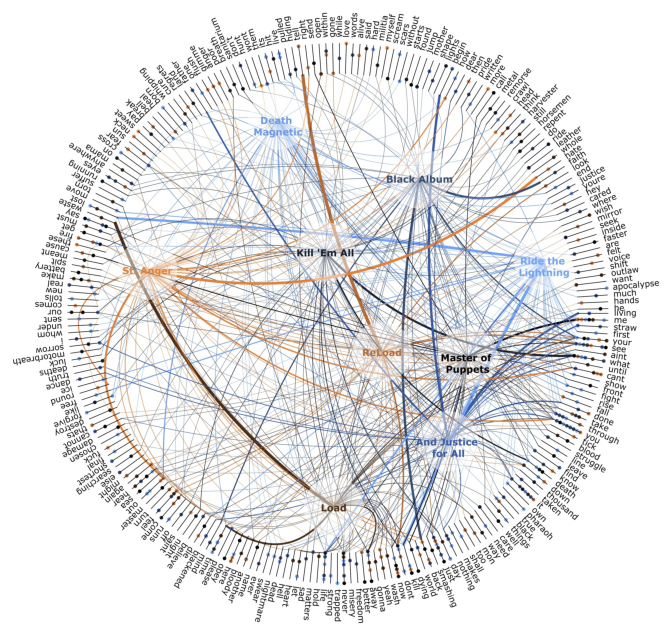

In [165]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('examples/complex_data_v.jpg')

plt.figure(figsize=(12, 8))  # Width, Height in inches
plt.imshow(img)
plt.axis('off')
plt.show()

In [182]:
with open("examples/complex_data_v.jpg", "rb") as f:
    res_2 = requests.post(
        "http://localhost:8000/multimodal/",
        files={"file": ("complex_data_v.jpg", f, "image/jpeg")},
        data={"query": "What story does this data visualization tell? Are there any outliers or anomalies?"}
    )
print(res_2.status_code)
print(res_2.json())


200
{'final_answer': '**Multimodal Reasoning Output** Given the provided data visualization (map of destinations and flights), I will combine all available modalities to extract insights. Since there are no audio or video transcripts, we will rely on the retrieved knowledge from the RAG context for grounded answers. **Step 1: Data Visualization Analysis** The map visualization shows various destinations and flights with blue lines indicating travel routes and labels indicating airport or city names. This suggests a focus on transportation networks and connectivity between different locations. **Step 2: RAG Context Analysis** From the RAG context, we have four image captions that are unrelated to the data visualization. These captions describe futuristic cityscapes, industrial areas, and events (e.g., awards ceremonies). Since these images do not provide relevant information about the map or transportation networks, they can be disregarded for this analysis. **Step 3: Outlier Detection*

# Audio Ingestion API Test

In [ ]:
with open("examples/harvard.wav", "rb") as f:
    res = requests.post(
        "http://localhost:8000/ingest/ingest",
        files={"file": ("harvard.wav", f, "audio/wav")}
    )

audio_ingest = res.json()
audio_ingest
